In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
wd = pd.read_csv(r"C:\Users\99299\OneDrive\Desktop\Desktop\test jupyter\Walmart_data.csv")
wd

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
# Information regarding dataset
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
# Shape of the dataset
wd.shape

(550068, 10)

In [6]:
# Finding missing values
wd.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
wd.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [8]:
# Finding unique values in the column
wd['Purchase'].nunique()

18105

In [9]:
wd['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
wd['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
wd['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [12]:
wd['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
wd['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
wd['Marital_Status'].unique()

array([0, 1], dtype=int64)

# Univariate analysis

In [15]:
wd.groupby('Gender')['User_ID'].count()

Gender
F    135809
M    414259
Name: User_ID, dtype: int64

In [16]:
wd.groupby('Gender')['Occupation'].mean()

Gender
F    6.74054
M    8.51475
Name: Occupation, dtype: float64

So mainly average of occupation represents the male are more occupied than female either difference is not more large
    Gender     Mean of Occupation
    F         6.74054 
    M         8.51475  


<Axes: xlabel='Gender', ylabel='Product_Category'>

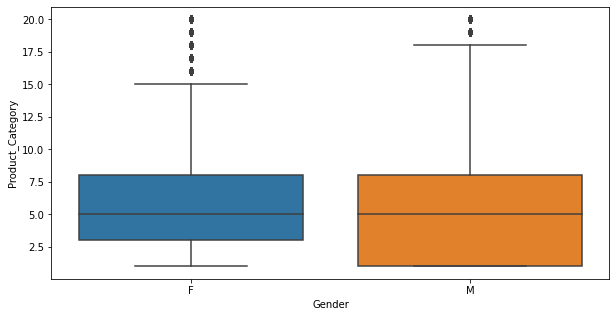

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=wd, x='Gender', y='Product_Category',ax=ax)
# Basicaly this graph tell us that females are not intrested to purchase low product_catagory than male are intrested to purchasing.
# And male are intrested to purchase wide range of product catagory items 

Calculate the average spending per transaction for female and male customers.

In [52]:
Avrage_spending = wd.groupby('Gender')['Purchase'].mean()
Avrage_spending

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

<Axes: xlabel='Gender', ylabel='Purchase'>

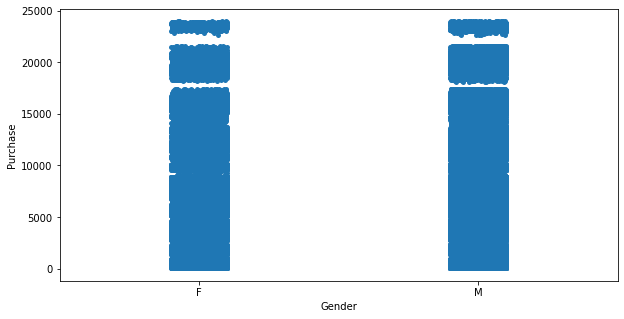

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(data=wd, x='Gender', y='Purchase', ax=ax)






# Dealing with Outliers

In [18]:
# In finding outliers we can take a help with boxplot
#Trx done by diff Gen

wd.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


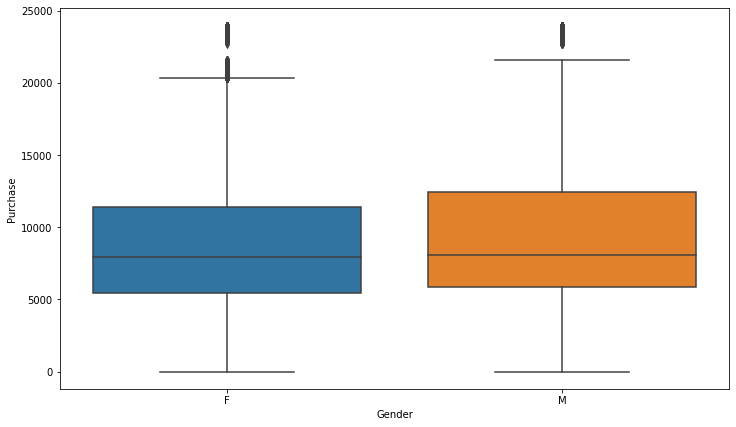

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(x='Gender', y='Purchase', data=wd, ax =ax)
plt.show()
# So this graph shows that the purchase contains some outliers in both the gender.

<Axes: xlabel='City_Category', ylabel='Purchase'>

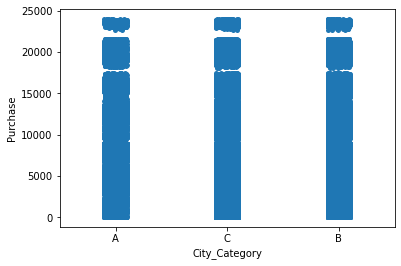

In [20]:
# it can easly understandable with the help of scatter plot
sns.stripplot(data=wd ,x='City_Category',y='Purchase')

As we know that the according to the normal distribution the 99.7% data lies in the third standard deviation.

## By the IQR method we will recognize the outliers

In [21]:
#Sort your data from low to high
# Identify the first quartile (Q1), the median, and the third quartile (Q3).
# Calculate your IQR = Q3 – Q1
# Calculate your upper fence = Q3 + (1.5 * IQR)
# Calculate your lower fence = Q1 – (1.5 * IQR)
# Use your fences to highlight any outliers, all values that fall outside your fences.

In [22]:
Q1 = wd['Purchase'].quantile(0.25)
Q2 = wd['Purchase'].quantile(0.50)
Q3 = wd['Purchase'].quantile(0.75)
IQR = Q3-Q1
Lower_fence = Q1-(1.5 * IQR)
Upper_fence = Q3-(1.5 * IQR)

In [23]:
print(Upper_fence,Lower_fence,IQR,Q1,Q2,Q3)

2707.5 -3523.5 6231.0 5823.0 8047.0 12054.0


In [24]:
without_outliers = wd[(wd['Purchase']>Lower_fence)&(wd['Purchase']>Upper_fence)]
without_outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
...,...,...,...,...,...,...,...,...,...,...
545909,1006040,P00227142,M,26-35,6,B,2,0,5,3598
545910,1006040,P00184342,M,26-35,6,B,2,0,8,9855
545912,1006040,P00029842,M,26-35,6,B,2,0,8,7852
545913,1006040,P00106042,M,26-35,6,B,2,0,5,7159


Removing outliers in this data will not effect are result so much that's why we are taken a data as it is without any removal of outliers

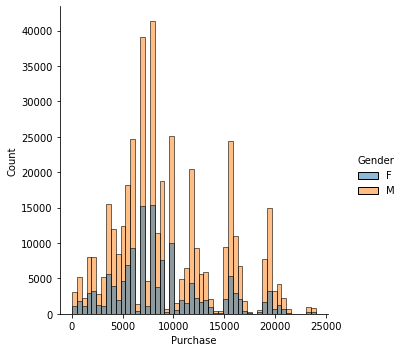

In [25]:
# Now displayong a graph which shows that the Male, female count vs purchase ratio
sns.displot(x='Purchase', data=wd, bins=50, hue='Gender')
plt.show()
# this graph has not clearly showing any distribution because it is wide distribute with their values so we use sampling technique to identifying the distribution between two categories

# Are women spending more money per transaction than men? Why or why not?

In [27]:
wd

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [63]:
wd.groupby('Gender')['Purchase'].describe()
# so womens are not spending more money than men

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


# Using the samples of averages to find confidence intervals for the population average.

In [108]:
np.random.seed(42)

# Randomly sample the wd for female and male customers
sample_size = 1000 
female_sample = wd[wd['Gender'] == 'F'].sample(sample_size)
male_sample = wd[wd['Gender'] == 'M'].sample(sample_size)

# Calculate sample mean for female and male customers
sample_mean_female = female_sample['Purchase'].mean()
sample_mean_male = male_sample['Purchase'].mean()

# Calculate sample standard deviation for female and male customers
sample_std_female = female_sample['Purchase'].std()
sample_std_male = male_sample['Purchase'].std()

# Calculate sample size for female and male customers
sample_size_female = female_sample.shape[0]
sample_size_male = male_sample.shape[0]

# Assume a confidence level (e.g., 95%)
confidence_level = 0.90

# Calculate the critical value for the confidence interval
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the standard error for each group
standard_error_female = sample_std_female / np.sqrt(sample_size_female)
standard_error_male = sample_std_male / np.sqrt(sample_size_male)

# Calculate the margin of error for each group
margin_of_error_female = z_critical * standard_error_female
margin_of_error_male = z_critical * standard_error_male

# Calculate the confidence intervals for each group
confidence_interval_female = (sample_mean_female - margin_of_error_female,
                              sample_mean_female + margin_of_error_female)

confidence_interval_male = (sample_mean_male - margin_of_error_male,
                            sample_mean_male + margin_of_error_male)

print("Confidence interval for average spending of female customers:", confidence_interval_female)
print("Confidence interval for average spending of male customers:", confidence_interval_male)

Confidence interval for average spending of female customers: (8477.45529752209, 8981.17270247791)
Confidence interval for average spending of male customers: (9207.165606904575, 9737.522393095423)


The confidence intervals provide us with a range of possible values for the average spending of female and male customers. Notably, the confidence intervals for both genders overlap with each other. This suggests that there is no statistically significant difference between the average spending of female and male customers.
So, focusing on the basis of gender we have to focus on the other aspect like offer and discount.

# Using the samples of averages to find central limt of the population average.

In [95]:
# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to draw
num_samples = 300

# Sample size for each sample
sample_size = 100  # You can adjust the sample size as needed

# Lists to store sample means for both genders
sample_means_female = []
sample_means_male = []

# Loop to draw samples and calculate sample means
for _ in range(num_samples):
    # Randomly sample wd for female and male customers
    female_sample = wd[wd['Gender'] == 'F']['Purchase'].sample(sample_size)
    male_sample = wd[wd['Gender'] == 'M']['Purchase'].sample(sample_size)
    
    # Calculate sample mean for each sample
    sample_means_female.append(female_sample.mean())
    sample_means_male.append(male_sample.mean())

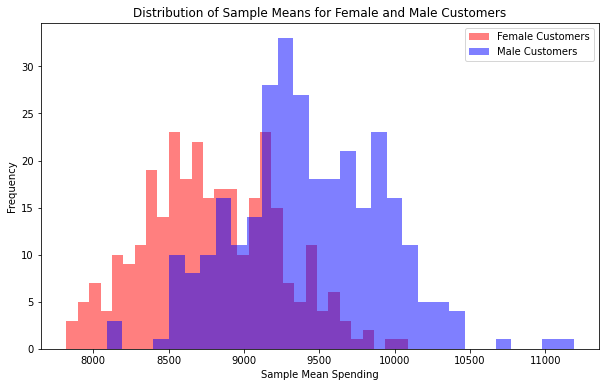

In [112]:
plt.figure(figsize=(10, 6))
plt.hist(sample_means_female, bins=30, alpha=0.5, label='Female Customers', color='red')
plt.hist(sample_means_male, bins=30, alpha=0.5, label='Male Customers', color='blue')
plt.xlabel('Sample Mean Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means for Female and Male Customers')
plt.legend()
plt.show()


As per the above graph we can noticing that both the data is overlaping on each other and when we see the distribution of the graph its normal distribution.

# Analysis for married and unmarried customers

In [120]:
np.random.seed(42)

# Randomly sample the wd for married and unmarried customers
sample_size = 1000 
married_sample = wd[wd['Marital_Status'] == 1].sample(sample_size)
unmarried_sample = wd[wd['Marital_Status'] == 0].sample(sample_size)

# Calculate sample mean for married and unmarried customers
sample_mean_married = married_sample['Purchase'].mean()
sample_mean_unmarried = unmarried_sample['Purchase'].mean()

# Calculate sample standard deviation for married and unmarried customers
sample_std_married = married_sample['Purchase'].std()
sample_std_unmarried = unmarried_sample['Purchase'].std()

# Calculate sample size for married and unmarried customers
sample_size_married = married_sample.shape[0]
sample_size_unmarried = unmarried_sample.shape[0]

# Assume a confidence level (e.g., 95%)
confidence_level = 0.99

# Calculate the critical value for the confidence interval
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the standard error for each group
standard_error_married = sample_std_married / np.sqrt(sample_size_married)
standard_error_unmarried = sample_std_unmarried / np.sqrt(sample_size_unmarried)

# Calculate the margin of error for each group
margin_of_error_married = z_critical * standard_error_married
margin_of_error_unmarried = z_critical * standard_error_unmarried

# Calculate the confidence intervals for each group
confidence_interval_married = (sample_mean_married - margin_of_error_married,
                               sample_mean_married + margin_of_error_married)

confidence_interval_unmarried = (sample_mean_unmarried - margin_of_error_unmarried,
                                 sample_mean_unmarried + margin_of_error_unmarried)

print("Confidence interval for average spending of married customers:", confidence_interval_married)
print("Confidence interval for average spending of unmarried customers:", confidence_interval_unmarried)

Confidence interval for average spending of married customers: (8733.511585881713, 9551.882414118287)
Confidence interval for average spending of unmarried customers: (9091.764029204747, 9933.241970795254)


In [118]:
# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples to draw
num_samples = 300

# Sample size for each sample
sample_size = 100  # You can adjust the sample size as needed

# Lists to store sample means for both genders
sample_means_maried = []
sample_means_unmaried = []

# Loop to draw samples and calculate sample means
for _ in range(num_samples):
    # Randomly sample wd for female and male customers
    unmaried_sample = wd[wd['Marital_Status'] == 0 ]['Purchase'].sample(sample_size)
    maried_sample = wd[wd['Marital_Status'] == 1 ]['Purchase'].sample(sample_size)
    
    # Calculate sample mean for each sample
    sample_means_maried.append(maried_sample.mean())
    sample_means_unmaried.append(unmaried_sample.mean())

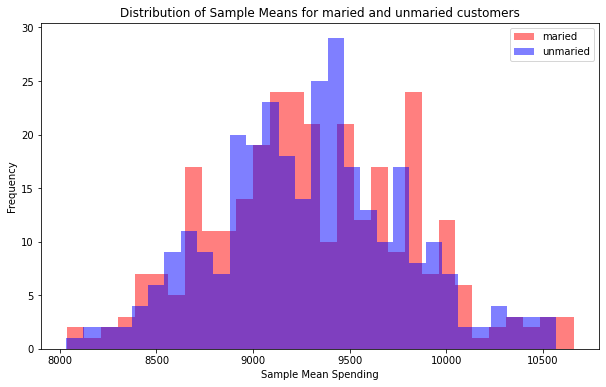

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(sample_means_maried, bins=30, alpha=0.5, label='maried', color='red')
plt.hist(sample_means_unmaried, bins=30, alpha=0.5, label='unmaried', color='blue')
plt.xlabel('Sample Mean Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means for maried and unmaried customers')
plt.legend()
plt.show()    

Both the data is overlapping that'why we also can't consider this data as statistical significant diffrence. 
so on the basis of married and unmaried we can't reach on any result.

# On the basis of age group let see the data distribution.

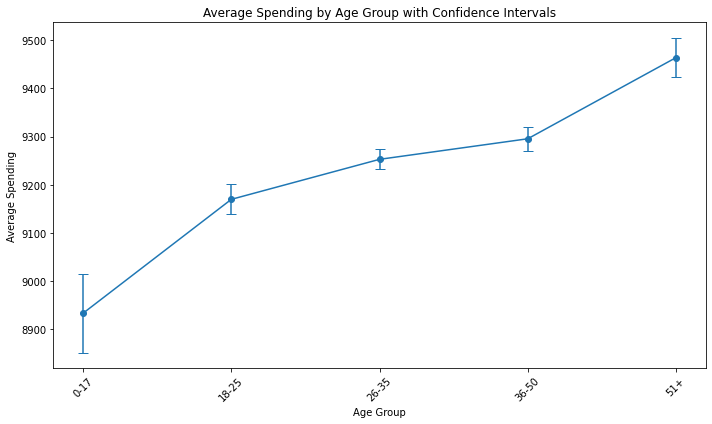

In [159]:
# Define age bins
age_bins = [0, 17, 25, 35, 50, np.inf]
age_labels = ['0-17', '18-25', '26-35', '36-50', '51+']

# Create a new column for age group
wd['Age_Group'] = pd.cut(wd['Age'], bins=age_bins, labels=age_labels, right=False)

# Assume a confidence level (e.g., 95%)
confidence_level = 0.95

# Function to calculate confidence interval for each age group
def calculate_confidence_interval(sample_wd):
    sample_size = len(sample_wd)
    sample_mean = sample_wd['Purchase'].mean()
    sample_std = sample_wd['Purchase'].std()
    standard_error = sample_std / np.sqrt(sample_size)
    t_critical = stats.t.ppf(1 - (1 - confidence_level) / 2, df=sample_size - 1)
    margin_of_error = t_critical * standard_error
    return sample_mean, margin_of_error

# Calculate confidence intervals for each age group
confidence_intervals = wd.groupby('Age_Group').apply(calculate_confidence_interval)

# Create lists to store average spending, margin of error, and age group labels
average_spending = []
margin_of_error = []
age_group_labels = []

# Extract average spending, margin of error, and age group labels from confidence_intervals
for age_group, interval in confidence_intervals.items():
    average_spending.append(interval[0])
    margin_of_error.append(interval[1])
    age_group_labels.append(age_group)

# Plot the histogram of average spending
plt.figure(figsize=(10, 6))
plt.errorbar(age_group_labels, average_spending, yerr=margin_of_error, fmt='o-', capsize=5)
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group with Confidence Intervals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [158]:
"average_spending",average_spending,"margin_of_error",margin_of_error,"age_group_labels",age_group_labels

('average_spending',
 [8933.464640444974,
  9169.663606261289,
  9252.690632869888,
  9295.331742810537,
  9463.661678193484],
 'margin_of_error',
 [81.52320408375226,
  31.25603711426898,
  20.95707198586544,
  24.86906921485397,
  40.49611163861562],
 'age_group_labels',
 ['0-17', '18-25', '26-35', '36-50', '51+'])